<a href="https://colab.research.google.com/github/talalba/mixed_data_retail/blob/master/main_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
from sklearn.model_selection import train_test_split
from keras.layers.core import Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import concatenate
import numpy as np
import argparse
import locale
import os
import pandas as pd
import csv
import glob
import os
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.io import imread
from sklearn.model_selection import train_test_split
from pandas import read_excel
import cv2
import pathlib
import multiprocessing
from joblib import Parallel, delayed
num_cores = multiprocessing.cpu_count()
# from models import models
import importlib
import locale
from random import randrange
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
# drive.mount('/content/drive')
import gzip



In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
directoryPath = '/content/drive/My Drive/'
image_path = '/content/drive/My Drive//Colab Notebooks/images2/'
# ! ls /content/drive/My\ Drive/
data_all = pd.read_pickle(directoryPath+'dbo.data_all3.pkl')
# f = gzip.GzipFile(directoryPath+'data_images.npy.gz', "r")
# data_images = np.load(f)
# train_data_with_images = pd.read_pickle(directoryPath+'dbo.train_data_with_images.pkl')
target_variable = 'CPM'

# train_data = data_all[['Id_x','Impressions','AveragePosition','Sold','Rating',target_variable]]
train_data = data_all[['Id_x',target_variable,'Title','KeyWords']]
train_data = train_data.loc[train_data[target_variable]>0]
train_data = train_data.dropna()



In [19]:
# loading training images and resize
train_img = []
id = []
heights = []
widths = []
i=0
for img_name in tqdm(train_data['Id_x'].values.astype(str)):
    # defining the image path
    path = image_path + img_name + '.jpg'
    try:
        # reading the image
        img = cv2.imread(path)
        heights.append(img.shape[0])
        widths.append(img.shape[1])
        # normalizing the pixel values
        # converting the type of pixel to float 32
        # img = img.astype('float32')
        # appending the image into the list
        img = cv2.resize(img, (128, 128))
        img = img/255.0
        train_img.append(img)
        id.append(img_name)
    except:
        pass

data_images =  np.array(train_img)
len(data_images)
len(id)
# type(data_images[1,1,1][0])

100%|██████████| 309/309 [00:03<00:00, 82.34it/s]


272

In [4]:
print(data_images.shape)
print(train_data_with_images.shape)

(788, 128, 128, 3)
(788, 6)


In [0]:
train_data_with_images = train_data.loc[train_data['Id_x'].isin(id)]

df = train_data_with_images.drop(['Id_x'],axis=1)

# df['CPM'] = np.log(df['CPM'])
images = data_images

split = train_test_split(df, images, test_size=0.4, random_state=42)
(trainAttrX, testAttrX, trainImagesX, testImagesX) = split


# cs = MinMaxScaler()
# trainX = cs.fit_transform(trainAttrX.drop([target_variable],axis=1))
# testX = cs.transform(testAttrX.drop([target_variable],axis=1))

# trainX = trainAttrX.drop([target_variable],axis=1).values
# testX = testAttrX.drop([target_variable],axis=1).values


# trainX.shape
# testX.shape

# trainAttrX[target_variable] = np.log(trainAttrX[target_variable])

maxPrice = trainAttrX[target_variable].max()
trainY = (trainAttrX[target_variable]/ maxPrice).values
testY = (testAttrX[target_variable]/ maxPrice).values

# trainY = (trainAttrX[target_variable]).values
# testY = (testAttrX[target_variable]).values


In [0]:
# # import the necessary packages
# from keras.models import Sequential
# from keras.layers.normalization import BatchNormalization
# from keras.layers.convolutional import Conv2D
# from keras.layers.convolutional import MaxPooling2D
# from keras.layers.core import Activation
# from keras.layers.core import Dropout
# from keras.layers.core import Dense
# from keras.layers import Flatten
# from keras.layers import Input
# from keras.models import Model
# def create_cnn(width, height, depth, filters=(16, 32, 64), regress=False):
# 	# initialize the input shape and channel dimension, assuming
# 	# TensorFlow/channels-last ordering
# 	inputShape = (height, width, depth)
# 	chanDim = -1

# 	# define the model input
# 	inputs = Input(shape=inputShape)

# 	# loop over the number of filters
# 	for (i, f) in enumerate(filters):
# 		# if this is the first CONV layer then set the input
# 		# appropriately
# 		if i == 0:
# 			x = inputs

# 		# CONV => RELU => BN => POOL
# 		x = Conv2D(f, (3, 3), padding="same")(x)
# 		x = Activation("relu")(x)
# 		x = BatchNormalization(axis=chanDim)(x)
# 		x = MaxPooling2D(pool_size=(2, 2))(x)
# 		# flatten the volume, then FC => RELU => BN => DROPOUT
# 		x = Flatten()(x)
# 		x = Dense(16)(x)
# 		x = Activation("relu")(x)
# 		x = BatchNormalization(axis=chanDim)(x)
# 		x = Dropout(0.5)(x)

# 		# apply another FC layer, this one to match the number of nodes
# 		# coming out of the MLP
# 		x = Dense(4)(x)
# 		x = Activation("relu")(x)

# 		# check to see if the regression node should be added
# 		if regress:
# 			x = Dense(1, activation="linear")(x)

# 		# construct the CNN
# 		model = Model(inputs, x)

# 		# return the CNN
# 		return model


In [0]:
# model = create_cnn(128, 128, 3, regress=True)
# opt = Adam(lr=1e-2, decay=1e-3 / 200)
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K
from keras.datasets import mnist
import numpy as np

# opt=keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
input_shape = (128,128,3)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(loss=keras.losses.mean_absolute_error,
              optimizer=keras.optimizers.Adam(),
              metrics=['mae'])

# model.compile(loss="mean_absolute_percentage_error", optimizer=opt)
# train the model
print("[INFO] training model...")
model.fit(trainImagesX, trainY, validation_data=(testImagesX, testY),
	epochs=20, batch_size=8)
preds = model.predict(testImagesX)


<function ndarray.min>

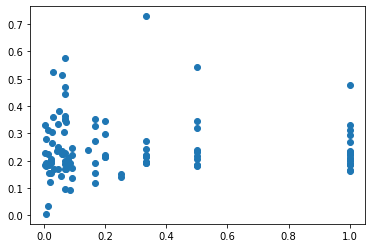

In [37]:
plt.scatter(testY,preds.flatten())
preds.flatten().min

In [0]:
# model = create_cnn(128, 128, 3, regress=True)
# opt = Adam(lr=1e-2, decay=1e-3 / 200)

# model.compile(loss=keras.losses.mean_squared_error,
#               optimizer=keras.optimizers.Adadelta(),
#               metrics=['mse'])
# model.fit(trainImagesX, trainY, validation_data=(testImagesX, testY),
# 	epochs=3, batch_size=8)
# preds = model.predict(testImagesX)

In [0]:
# # import the necessary packages
# from keras.models import Sequential
# from keras.layers.normalization import BatchNormalization
# from keras.layers.convolutional import Conv2D
# from keras.layers.convolutional import MaxPooling2D
# from keras.layers.core import Activation
# from keras.layers.core import Dropout
# from keras.layers.core import Dense
# from keras.layers import Flatten
# from keras.layers import Input
# from keras.models import Model
# from keras import optimizers

# model = Sequential()
# model.add(Dense(15, input_dim=trainX.shape[1], activation="relu"))
# # model.add(Dense(2, activation="relu"))
# model.add(Dense(1, activation="linear"))

# opt = Adam(lr=1e-4, decay=1e-2 / 200)
# # opt = optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False)

# model.compile(loss="mean_squared_error", optimizer=opt)
# # train the model
# print("[INFO] training model...")
# model.fit(trainX, trainY, validation_data=(testX, testY),
# 	epochs=200, batch_size=8)
# preds = model.predict(testX)
# #

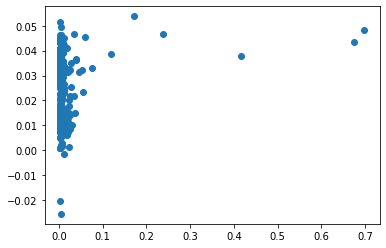

In [0]:
# plt.scatter(testY,preds.flatten())
